In [1]:
# Imports
import os

import numpy as np
from pandas.io.parsers import read_csv
from sklearn.utils import shuffle

In [2]:
# Load data files
FTRAIN = 'Data/training.csv'
FTEST = 'Data/test.csv'

In [3]:
def load(test=False, cols=None):
    """Loads data from FTEST if *test* is True, otherwise from FTRAIN.
    Pass a list of *cols* if you're only interested in a subset of the
    target columns.
    """
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  # load pandas dataframe

    # The Image column has pixel values separated by space; convert
    # the values to numpy arrays:
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    if cols:  # get a subset of columns
        df = df[list(cols) + ['Image']]

    print(df.count())  # prints the number of values for each column
    df = df.dropna()  # drop all rows that have missing values in them

    X = np.vstack(df['Image'].values) / 255.  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    if not test:  # only FTRAIN has any target columns
        y = df[df.columns[:-1]].values
        y = (y - 48) / 48  # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42)  # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None

    return X, y

In [4]:
X, y = load()
print("X.shape == {}; X.min == {:.3f}; X.max == {:.3f}".format(
    X.shape, X.min(), X.max()))
print("y.shape == {}; y.min == {:.3f}; y.max == {:.3f}".format(
    y.shape, y.min(), y.max()))

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

## Model 1
### Simple 3-Layer Neural Network

In [5]:
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=9216))
model.add(Dense(30))

model.summary()

/home/shashwat/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               921700    
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3030      
Total params: 924,730
Trainable params: 924,730
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.02, momentum=0.9, nesterov=True), loss='mean_squared_error')

In [7]:
from keras.callbacks import EarlyStopping

epochs = 400
early_stops = EarlyStopping(patience=10, monitor='val_loss')

model.fit(X, y, epochs=epochs, validation_split=0.2, callbacks=[early_stops], verbose=1)

Train on 1712 samples, validate on 428 samples
Epoch 1/400
1712/1712 [==============================] - 0s - loss: 0.1308 - val_loss: 0.0324
Epoch 2/400
1712/1712 [==============================] - 0s - loss: 0.0143 - val_loss: 0.0095
Epoch 3/400
1712/1712 [==============================] - 0s - loss: 0.0065 - val_loss: 0.0053
Epoch 4/400
1712/1712 [==============================] - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 5/400
1712/1712 [==============================] - 0s - loss: 0.0051 - val_loss: 0.0050
Epoch 6/400
1712/1712 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0050
Epoch 7/400
1712/1712 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0051
Epoch 8/400
1712/1712 [==============================] - 0s - loss: 0.0047 - val_loss: 0.0054
Epoch 9/400
1712/1712 [==============================] - 0s - loss: 0.0045 - val_loss: 0.0046
Epoch 10/400
1712/1712 [==============================] - 0s - loss: 0.0044 - val_loss: 0.0058
Epoch 11/400

1712/1712 [==============================] - 0s - loss: 0.0029 - val_loss: 0.0035
Epoch 87/400
1712/1712 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0037
Epoch 88/400
1712/1712 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 89/400
1712/1712 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0038
Epoch 90/400
1712/1712 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 91/400
1712/1712 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0036
Epoch 92/400
1712/1712 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 93/400
1712/1712 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 94/400
1712/1712 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 95/400
1712/1712 [==============================] - 0s - loss: 0.0028 - val_loss: 0.0033
Epoch 96/400
1712/1712 [==============================] - 0s - 

ImageId    1783
Image      1783
dtype: int64


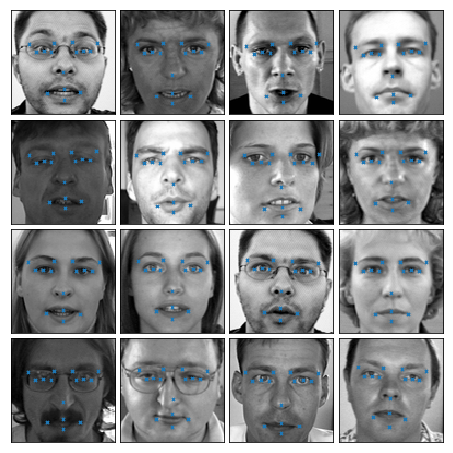

In [8]:
import matplotlib.pyplot as plt
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)

X, _ = load(test=True)
y_pred = model.predict(X)

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    plot_sample(X[i], y_pred[i], ax)

plt.show()

## Model 2
### Conv Net

In [9]:
def load2d(test=False, cols=None):
    X, y = load(test=test)
    X = X.reshape(-1, 96, 96, 1)
    return X, y

In [28]:
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

model2 = Sequential()
model2.add(Conv2D(32,(3,3), activation='relu', input_shape=(96,96,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64,(2,2), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(128,(2,2), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

#model2.add(GlobalAveragePooling2D(data_format=None))
model2.add(Flatten())

model2.add(Dense(500, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(500, activation='relu'))
model2.add(Dense(30))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 46, 46, 64)        8256      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 22, 22, 128)       32896     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15488)             0         
__________

In [29]:
from keras.optimizers import SGD, Nadam

#model2.compile(optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True), loss='mean_squared_error')
model2.compile(optimizer=Nadam(lr=0.002), loss='mean_squared_error')

In [18]:
# load 2-d data
X, y = load2d()

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

In [30]:
from keras.callbacks import EarlyStopping

epochs = 50
early_stops = EarlyStopping(patience=5, monitor='val_loss')


model2.fit(X, y, epochs=epochs, validation_split=0.2, verbose=1)

Train on 1712 samples, validate on 428 samples
Epoch 1/50
1712/1712 [==============================] - 8s - loss: 0.1537 - val_loss: 0.0111
Epoch 2/50
1712/1712 [==============================] - 8s - loss: 0.0095 - val_loss: 0.0052
Epoch 3/50
1712/1712 [==============================] - 8s - loss: 0.0077 - val_loss: 0.0050
Epoch 4/50
1712/1712 [==============================] - 8s - loss: 0.0061 - val_loss: 0.0064
Epoch 5/50
1712/1712 [==============================] - 8s - loss: 0.0046 - val_loss: 0.0046
Epoch 6/50
1712/1712 [==============================] - 8s - loss: 0.0039 - val_loss: 0.0035
Epoch 7/50
1712/1712 [==============================] - 8s - loss: 0.0034 - val_loss: 0.0029
Epoch 8/50
1712/1712 [==============================] - 8s - loss: 0.0030 - val_loss: 0.0026
Epoch 9/50
1712/1712 [==============================] - 8s - loss: 0.0027 - val_loss: 0.0025
Epoch 10/50
1712/1712 [==============================] - 9s - loss: 0.0024 - val_loss: 0.0023
Epoch 11/50
1712/1712 

ImageId    1783
Image      1783
dtype: int64
ImageId    1783
Image      1783
dtype: int64


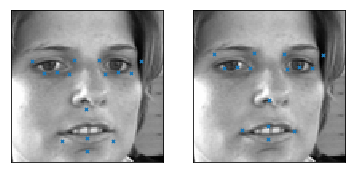

In [31]:
sample1 = load(test=True)[0][6:7]
sample2 = load2d(test=True)[0][6:7]
y_pred1 = model.predict(sample1)[0]
y_pred2 = model2.predict(sample2)[0]

fig = plt.figure(figsize=(6, 3))
ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
plot_sample(sample1[0], y_pred1, ax)
ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
plot_sample(sample1[0], y_pred2, ax)
plt.show()

In [32]:
# Save models
model.save('Models/model.h5')
model2.save('Models/model2.h5')